# Example notebook : explain global and local for binary classification

## Load packages

In [1]:
from transparentai.datasets import load_boston
from transparentai.explainer import ModelExplainer

from transparentai.utils import encode_categorical_vars

import pickle

## Load data

In [2]:
boston = load_boston()

## Load model

In [3]:
with open('save/model_regression.pkl', mode='rb') as file:
    reg = pickle.load(file)
file.close()

## Prepare data

In [4]:
target = 'MEDV'

In [5]:
X, y = boston.drop(columns=target), boston[target]

## Create model explainer

In [8]:
explainer = ModelExplainer(model=reg, X=X, model_type='linear')

## Global explanation

In [9]:
explainer.explain_global(X.sample(100))

{'CRIM': 0.506476821156253,
 'ZN': 0.7480023859571747,
 'INDUS': 0.12914193686288905,
 'CHAS': 0.34789486135074216,
 'NOX': 1.6113838160264444,
 'RM': 2.0451339865520524,
 'AGE': 0.015167695255383062,
 'DIS': 2.447244637853398,
 'RAD': 2.3718108812309993,
 'TAX': 1.8757421732944977,
 'PTRATIO': 1.7010831097216834,
 'B': 0.5731631851895846,
 'LSTAT': 2.6035683651209123}

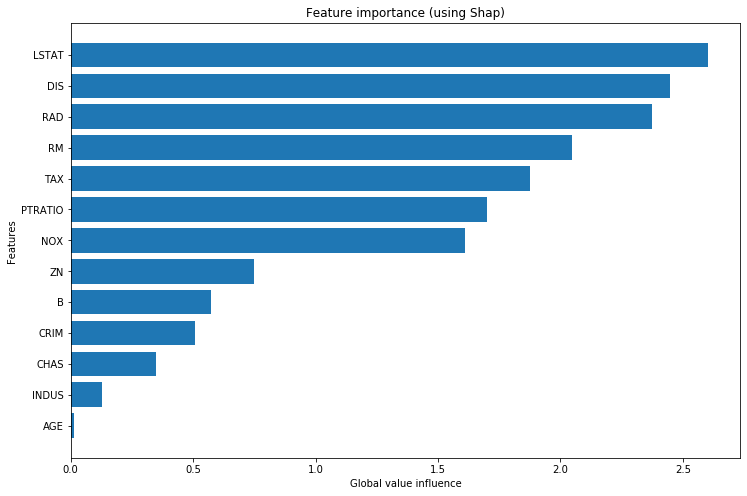

In [10]:
explainer.plot_global_explain()

## Local explanation

In [11]:
one_row = X.iloc[95]
explainer.explain_local(one_row)

{'CRIM=0.12204000000000001': 0.37711987989015006,
 'ZN=0.0': -0.5275052087145102,
 'INDUS=2.89': -0.16954244112323155,
 'CHAS=0.0': -0.18584127208907195,
 'NOX=0.445': 1.9489094720448328,
 'RM=6.625': 1.2967471052227606,
 'AGE=57.8': -0.007458652098123162,
 'DIS=3.4952': 0.4424379289351941,
 'RAD=2.0': -2.310492114077806,
 'TAX=276.0': 1.6310915971261917,
 'PTRATIO=18.0': 0.43400837333701775,
 'B=357.98': 0.012160763914996644,
 'LSTAT=6.65': 3.150157728567085}

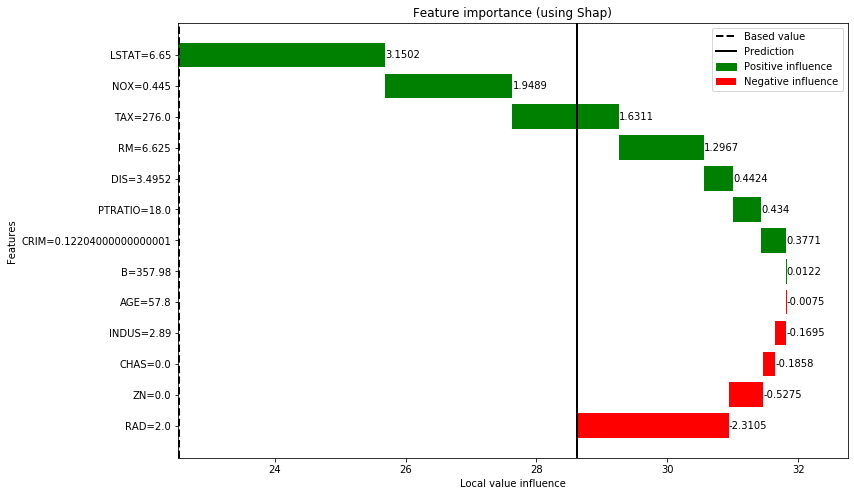

In [12]:
explainer.plot_local_explain(one_row)

## The end.